In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# read excel_file
df = pd.read_excel('testmatch_ranking.xlsx')

In [7]:
# drop the column which is not required for analysis
df.drop(columns ='Unnamed: 0',inplace = True)

>Understanding the dataset <br>
1. **.Get a high-level overview of the dataset.**
2. **Check the first few rows using df.head().**
3. **Get information about data types and missing values with df.info() and df.describe()**


In [8]:
# shows the information columns and data inside it.
df.head()

,player_rank,player_name,player_country,player_rating
0,1,Joe Root,ENGLAND,872
1,2,Kane Williamson,NEW ZEALAND,859
2,3,Babar Azam,PAKISTAN,768
3,3,Daryl Mitchell,NEW ZEALAND,768
4,5,Steven Smith,AUSTRALIA,757


In [9]:
# info shows the data type and null_values in each column with total rows and columns info()
# in testmatch_ranking dataset we do not have any null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_rank     98 non-null     int64 
 1   player_name     98 non-null     object
 2   player_country  98 non-null     object
 3   player_rating   98 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [10]:
# gives info related to max, mean, min and percentile related
# average rating of batsman is equals to 534.9 and 75% of batsmen having rating less than 633.5
df.describe()

,player_rank,player_rating
count,98.000000,98.000000
mean,49.826531,534.938776
std,28.926863,134.355492
min,1.000000,310.000000
25%,24.500000,428.750000
50%,49.500000,521.500000
75%,74.750000,633.500000
max,100.000000,872.000000


>Handle Missing Values: <br>
1 . **Identify missing values using df.isnull().sum().** <br>
2 . **Decide on strategies to handle them, such as filling with mean/median or dropping rows/columns.**

In [11]:
# checking all the null values in each column 
# we don't have any null value in our dataset
df.isnull().sum()

player_rank       0
player_name       0
player_country    0
player_rating     0
dtype: int64

>Univariate Analysis: <br>
1 . **Analyze individual columns to understand their distribution.** <br>
2 . **Use histograms, box plots, and count plots.**

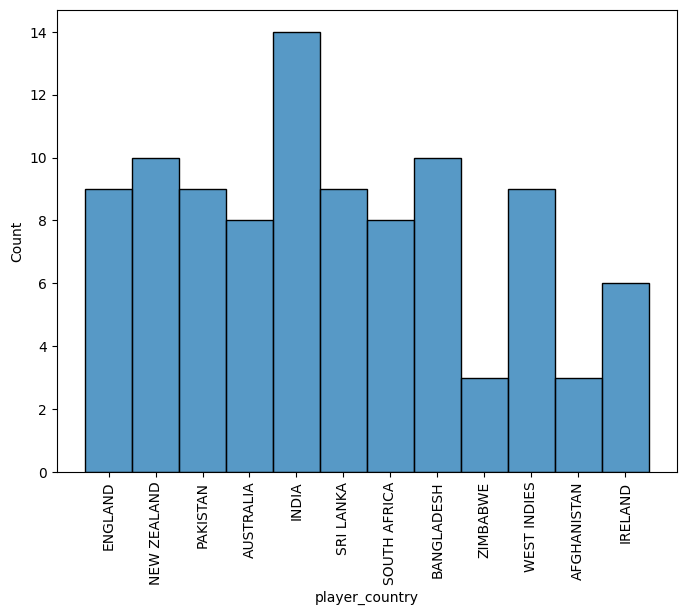

In [12]:
# each bar shows the number of player in each team 
# have the highest number of Indian player in top 100 test ranking
# Afghanistan and Zimbabwe have the lowest with the same number in top 100 test ranking
plt.figure(figsize=(8,6))
sns.histplot(df['player_country'])
plt.xticks(rotation='vertical')
plt.show()



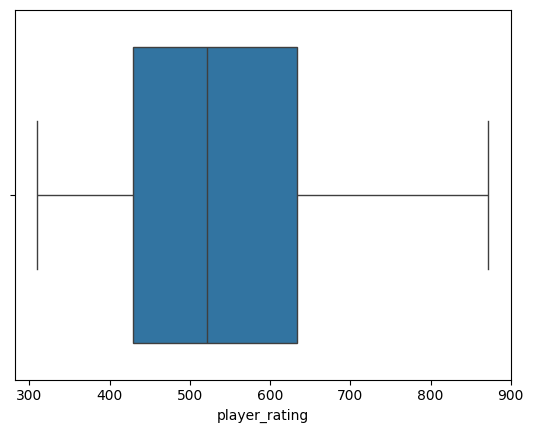

In [13]:
# this boxplot graph shows data there is no outlier in "rating_column"
sns.boxplot(x=df['player_rating'])
plt.show()

>Bivariate Analysis: <br>
1 . **Explore relationships between two variables.** <br>
2 . **Use scatter plots, correlation matrices, and pair plots.**

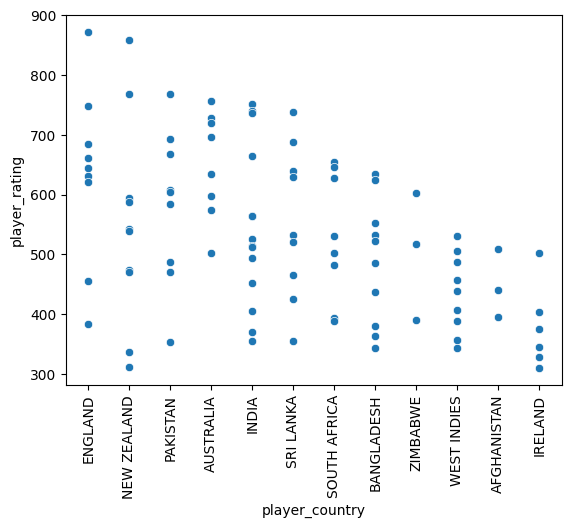

In [14]:
# scatter plot shows the relation between "player from each country" with the "player_rating"
sns.scatterplot(x='player_country', y='player_rating', data=df)
plt.xticks(rotation = "vertical")
plt.show()

<Axes: ylabel='count'>

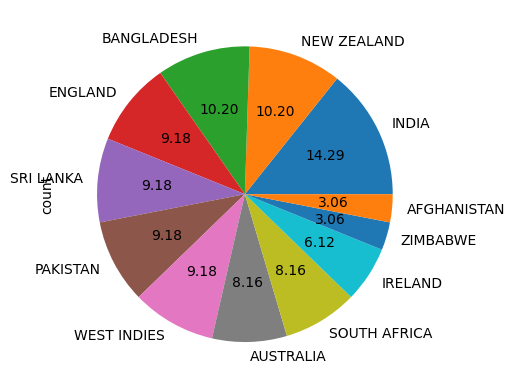

In [15]:
# pie chart shows the percentage of number of player from each country 
# india is on first rank with the highest number of player under 100 rank 
# while Afhanistan and Zimbabwe are on the lowest rank with the lowest number of player under 100 rank 
df['player_country'].value_counts().plot(kind = 'pie',autopct = "%.2f")

In [16]:
# this correlation shows that player rank increase but ".02%" less in comparison to player_rating or vice_versa
df.corr(numeric_only=True)

,player_rank,player_rating
player_rank,1.000000,-0.988324
player_rating,-0.988324,1.000000


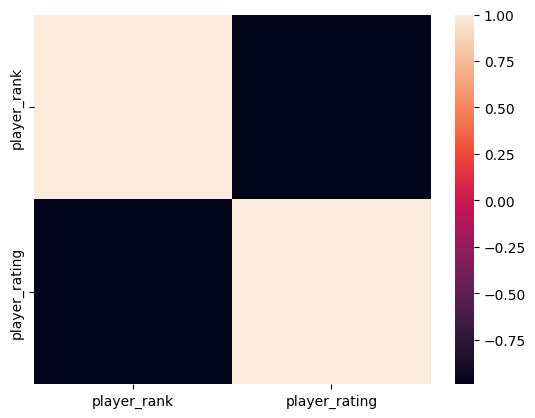

In [17]:
# this heatmap shows the relationship between the rank and rating column
sns.heatmap(df.corr(numeric_only=True))
plt.show()